In [143]:
# classification
# developing income classfier system for individuals
# supervised learning-we know the outcome variable value

In [144]:
!pip install scikit-learn

In [145]:
# importing libraries
import pandas as pd                                              # to work with data frames
import numpy as np                                               # to work with numerical operations
import seaborn as sns                                            # to visualize data
import matplotlib.pyplot as plt                                  # to visualize data
from sklearn.model_selection import train_test_split             # to partition the data
from sklearn.metrics import accuracy_score, confusion_matrix     #import performance metrics
from sklearn.linear_model import LogisticRegression              # define LogisticRegression
from sklearn import metrics

In [146]:
# reading csv file "income"

In [147]:
data_income=pd.read_csv('income.csv')
data_income

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,34,Local-gov,HS-grad,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60,United-States,"less than or equal to 50,000"
31974,34,Local-gov,Some-college,Never-married,Protective-serv,Not-in-family,White,Female,0,0,40,United-States,"less than or equal to 50,000"
31975,23,Private,Some-college,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,"less than or equal to 50,000"
31976,42,Local-gov,Some-college,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,"less than or equal to 50,000"


In [148]:
# creating a copy of the data by calling .copy() function
data=data_income.copy()

In [149]:
# Exploratory data analysis
# - Know the data
# - Data preprocessing
# - Cross tables and visualization


In [150]:
# Know the data
data.info()          # to check variables and data type


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            31978 non-null  int64 
 1   JobType        31978 non-null  object
 2   EdType         31978 non-null  object
 3   maritalstatus  31978 non-null  object
 4   occupation     31978 non-null  object
 5   relationship   31978 non-null  object
 6   race           31978 non-null  object
 7   gender         31978 non-null  object
 8   capitalgain    31978 non-null  int64 
 9   capitalloss    31978 non-null  int64 
 10  hoursperweek   31978 non-null  int64 
 11  nativecountry  31978 non-null  object
 12  SalStat        31978 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB


In [151]:
data.isnull().sum()        # to check missing values if at all

age              0
JobType          0
EdType           0
maritalstatus    0
occupation       0
relationship     0
race             0
gender           0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
SalStat          0
dtype: int64

In [152]:
#Summary of numerical variables
data.describe()

,age,capitalgain,capitalloss,hoursperweek
count,31978.000000,31978.000000,31978.000000,31978.000000
mean,38.579023,1064.360623,86.739352,40.417850
std,13.662085,7298.596271,401.594301,12.345285
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


In [153]:
# summary of categorical values
data.describe(include='O')

,JobType,EdType,maritalstatus,occupation,relationship,race,gender,nativecountry,SalStat
count,31978,31978,31978,31978,31978,31978,31978,31978,31978
unique,9,16,7,15,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,"less than or equal to 50,000"
freq,22286,10368,14692,4038,12947,27430,21370,29170,24283


In [154]:
# Frequency of each category
data['JobType'].value_counts()
data['EdType'].value_counts()
data['maritalstatus'].value_counts()
data['occupation'].value_counts()
data['relationship'].value_counts()
data['race'].value_counts()
data['gender'].value_counts()
data['nativecountry'].value_counts()
data['SalStat'].value_counts()


 less than or equal to 50,000    24283
 greater than 50,000              7695
Name: SalStat, dtype: int64

#### JobType and Occupation has '?'

In [155]:
# Checking for unique classes
np.unique(data['JobType'])

array([' ?', ' Federal-gov', ' Local-gov', ' Never-worked', ' Private',
       ' Self-emp-inc', ' Self-emp-not-inc', ' State-gov', ' Without-pay'],
      dtype=object)

In [156]:
# for occupation - check unique classes
np.unique(data['occupation'])


array([' ?', ' Adm-clerical', ' Armed-Forces', ' Craft-repair',
       ' Exec-managerial', ' Farming-fishing', ' Handlers-cleaners',
       ' Machine-op-inspct', ' Other-service', ' Priv-house-serv',
       ' Prof-specialty', ' Protective-serv', ' Sales', ' Tech-support',
       ' Transport-moving'], dtype=object)

#### there exists ' ?' instead of nan

In [157]:
# Go back and read data by including 'na_values[' ?'] to consider ' ?' as nan
data=pd.read_csv('income.csv',na_values=[' ?'])

In [158]:
# Data Preprocessing

In [159]:
data.isnull().sum()

age                 0
JobType          1809
EdType              0
maritalstatus       0
occupation       1816
relationship        0
race                0
gender              0
capitalgain         0
capitalloss         0
hoursperweek        0
nativecountry       0
SalStat             0
dtype: int64

#only JobType and occupation has missing values

In [160]:
# axis=1 to consider at least one column value is missing
missing=data[data.isnull().any(axis=1)]
missing

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
8,17,NaN,11th,Never-married,NaN,Own-child,White,Female,0,0,5,United-States,"less than or equal to 50,000"
17,32,NaN,Some-college,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,"less than or equal to 50,000"
29,22,NaN,Some-college,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
42,52,NaN,12th,Never-married,NaN,Other-relative,Black,Male,594,0,40,United-States,"less than or equal to 50,000"
44,63,NaN,1st-4th,Married-civ-spouse,NaN,Husband,White,Male,0,0,35,United-States,"less than or equal to 50,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31892,59,NaN,Bachelors,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
31934,20,NaN,HS-grad,Never-married,NaN,Other-relative,White,Female,0,0,35,United-States,"less than or equal to 50,000"
31945,28,NaN,Some-college,Married-civ-spouse,NaN,Wife,White,Female,0,1887,40,United-States,"greater than 50,000"
31967,80,NaN,HS-grad,Widowed,NaN,Not-in-family,White,Male,0,0,24,United-States,"less than or equal to 50,000"


points to note
- Missing values in JobType = 1809
- Missing values in occupation= 1816
- occupation unfilled for Jobtype becuase it is 'neverworked'

In [161]:
# We will drop such rows which have null values- could not find out the mechanicsm to fill na values and relationship 
data2= data.dropna(axis=0)
data2.shape

(30162, 13)

In [162]:
#  relationship between independent variables
correlation=data2.corr()
correlation

,age,capitalgain,capitalloss,hoursperweek
age,1.000000,0.080154,0.060165,0.101599
capitalgain,0.080154,1.000000,-0.032229,0.080432
capitalloss,0.060165,-0.032229,1.000000,0.052417
hoursperweek,0.101599,0.080432,0.052417,1.000000


-No strong relationship

In [163]:
# Cross Tables and Visualization

In [164]:
# Extracting coloumn names
data2.columns

Index(['age', 'JobType', 'EdType', 'maritalstatus', 'occupation',
       'relationship', 'race', 'gender', 'capitalgain', 'capitalloss',
       'hoursperweek', 'nativecountry', 'SalStat'],
      dtype='object')

In [165]:
# Gender proportion table
gender=pd.crosstab(index=data2['gender'],
                  columns= 'count',
                   normalize= True     # this gives proportion
                  )
gender

col_0,count
gender,
Female,0.324315
Male,0.675685


In [166]:
#gender vs salstat
gender_SalStat= pd.crosstab(index=data2['gender'],
                           columns=data2['SalStat'],
                            margins=True,              # presents All row as well
                           normalize='index')          # gives proportion
gender_SalStat

SalStat,"greater than 50,000","less than or equal to 50,000"
gender,,
Female,0.113678,0.886322
Male,0.313837,0.686163
All,0.248922,0.751078


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SalStat', ylabel='count'>

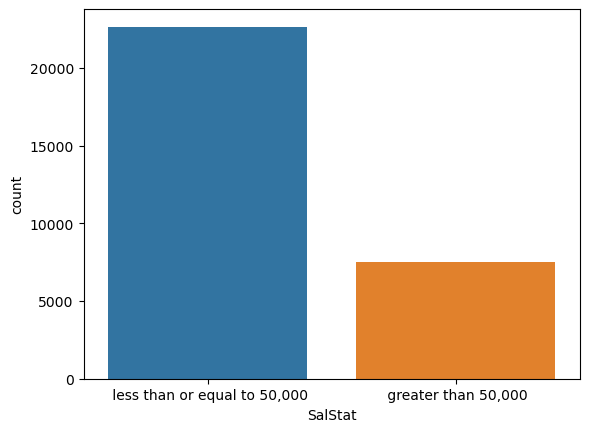

In [167]:
# Frequency distribution of Salstat
sns.countplot(data2['SalStat'])

- from above two we can conclude
- more than 75% people earn less than equeal to 50000
- less than 25 percent people earn more than 50000

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age'>

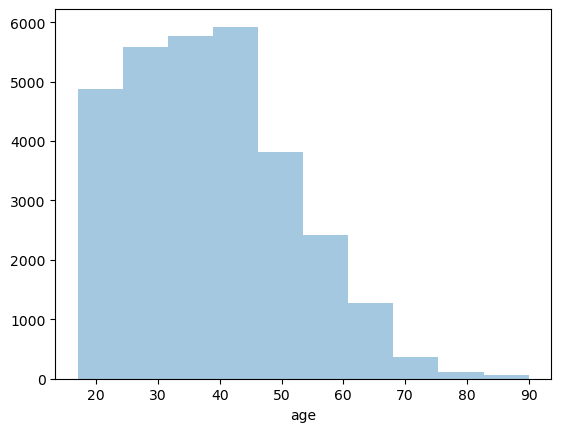

In [168]:
# Histogram of age
sns.distplot(data2['age'],bins=10,kde=False)  # you cann add kde=False and the line will remove itself

- People between 25-45 are high in frequency

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SalStat', ylabel='age'>

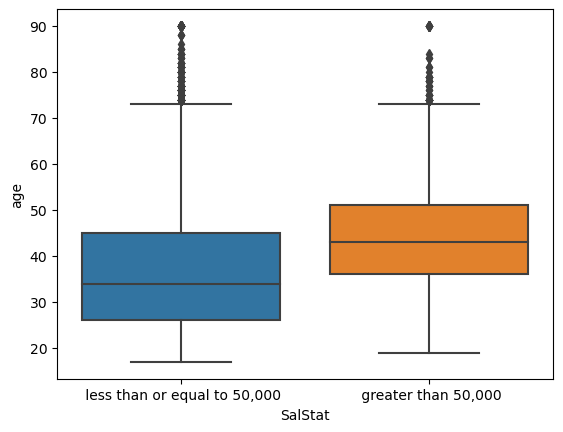

In [169]:
# Bivariate analysis you can use 'Box Plot'
# boxplot age vs salarystatus
sns.boxplot('SalStat','age',data=data2)

In [170]:
data2.groupby('SalStat')['age'].median() # to know exactly the median

SalStat
 greater than 50,000             43.0
 less than or equal to 50,000    34.0
Name: age, dtype: float64

-People with age 25-35 are likely to earn less than 50000

-People with age 35-50 are likely to earn more than 50000

In [171]:
# Exploratory Data Analysis

<AxesSubplot:xlabel='count', ylabel='JobType'>

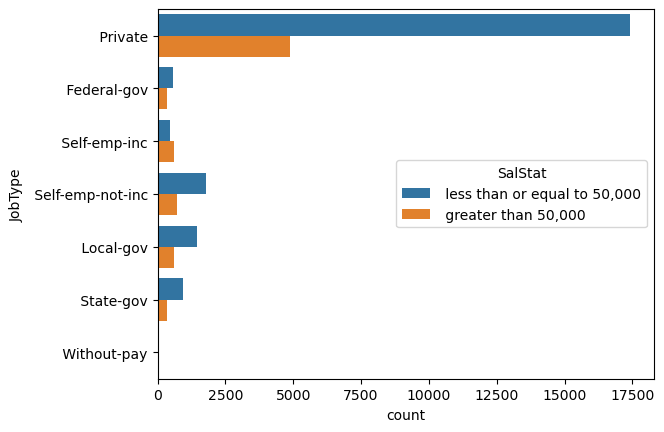

In [172]:
# CountPlot - JobType vs Salary Status
sns.countplot(y='JobType',hue='SalStat',data = data2)

In [173]:
# crosstable
pd.crosstab(index=data2['JobType'],
           columns=data2['SalStat'],
            margins=True,
            normalize='index'
           )

SalStat,"greater than 50,000","less than or equal to 50,000"
JobType,,
Federal-gov,0.387063,0.612937
Local-gov,0.294630,0.705370
Private,0.218792,0.781208
Self-emp-inc,0.558659,0.441341
Self-emp-not-inc,0.285714,0.714286
State-gov,0.268960,0.731040
Without-pay,0.000000,1.000000
All,0.248922,0.751078


-Almost 56% of Self Employed people earn more than 50,000

-An important variable in avoiding misuse of subsidies

<AxesSubplot:xlabel='count', ylabel='EdType'>

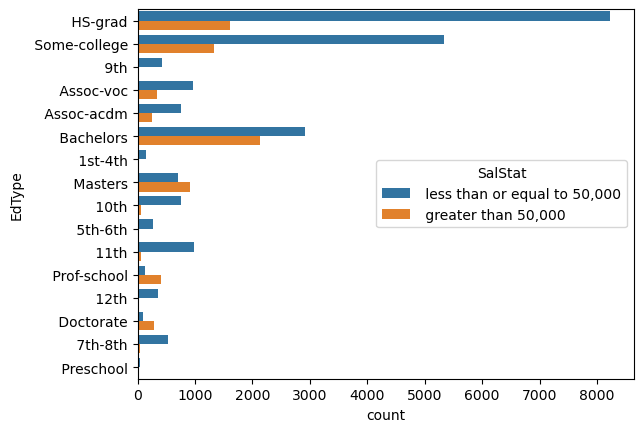

In [174]:
# Count Plot education vs salary status
sns.countplot(y='EdType', hue='SalStat',data=data2)


In [175]:
pd.crosstab(index=data2['EdType'],
           columns=data2['SalStat'],
           margins=True,
           normalize='index')

SalStat,"greater than 50,000","less than or equal to 50,000"
EdType,,
10th,0.071951,0.928049
11th,0.056298,0.943702
12th,0.076923,0.923077
1st-4th,0.039735,0.960265
5th-6th,0.041667,0.958333
7th-8th,0.062837,0.937163
9th,0.054945,0.945055
Assoc-acdm,0.253968,0.746032
Assoc-voc,0.263198,0.736802


- From above we can conclude that Doctorate, Masters and Prof_school category are more like to ear >=50000

- important variable in avoiding misuse of subsudies

<AxesSubplot:xlabel='count', ylabel='occupation'>

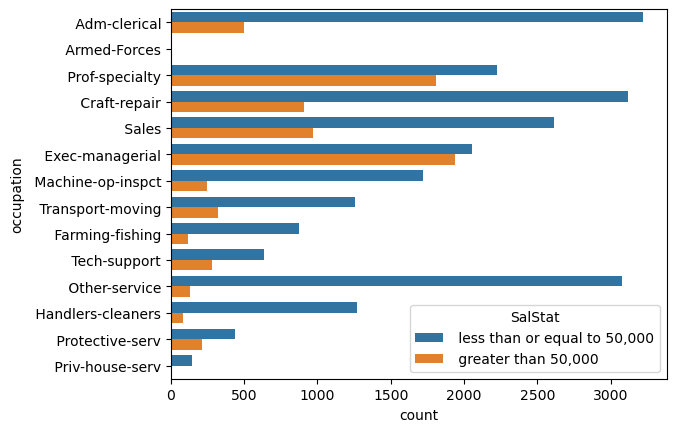

In [176]:
#Occupation v/s salary
sns.countplot(y='occupation', hue='SalStat',data=data2)

In [177]:
pd.crosstab(index=data2['occupation'],
           columns=data2['SalStat'],
           margins=True,
           normalize='index')

SalStat,"greater than 50,000","less than or equal to 50,000"
occupation,,
Adm-clerical,0.133835,0.866165
Armed-Forces,0.111111,0.888889
Craft-repair,0.225310,0.774690
Exec-managerial,0.485220,0.514780
Farming-fishing,0.116279,0.883721
Handlers-cleaners,0.061481,0.938519
Machine-op-inspct,0.124619,0.875381
Other-service,0.041096,0.958904
Priv-house-serv,0.006993,0.993007


- From above we can conclude that Exec managerial and Prof-speciality category are more like to ear >=50000
- important variable in avoiding misuse of subsudies

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='capitalgain'>

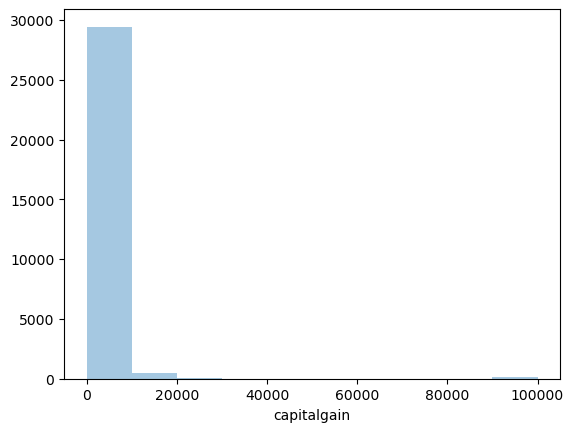

In [178]:
# capital gains
sns.distplot(data2['capitalgain'],bins=10,kde=False)

<AxesSubplot:xlabel='capitalloss'>

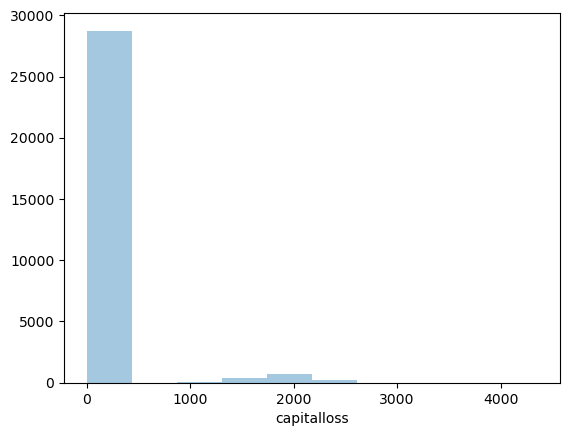

In [179]:
sns.distplot(data2['capitalloss'],bins=10,kde=False)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SalStat', ylabel='hoursperweek'>

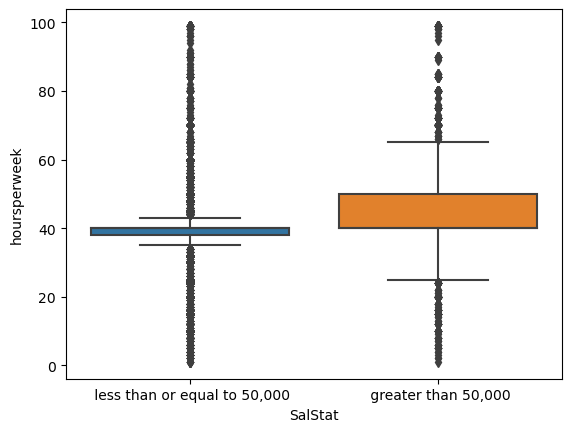

In [180]:
# Hours per week vs sal stat
sns.boxplot('SalStat','hoursperweek',data=data2)

- clearly shows that people earning more then 50000 USD are more like to spent more hours per week

#                                           LOGISTIC REGRESSION

In [181]:
# Reindexing teh salary status to 0 and 1 , as ML models dont work on categorical values
# we will map 0 and 1 using map function as dictionary
data2['SalStat']=data2['SalStat'].map({' less than or equal to 50,000':0,' greater than 50,000':1})
data2['SalStat']

/var/folders/4j/2jq20khd65sf51w388fyp_wm0000gn/T/ipykernel_988/741183925.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['SalStat']=data2['SalStat'].map({' less than or equal to 50,000':0,' greater than 50,000':1})


0        0
1        0
2        1
3        0
4        0
        ..
31973    0
31974    0
31975    0
31976    0
31977    0
Name: SalStat, Length: 30162, dtype: int64

In [182]:
# Converting categorical variables into dummy variables
new_data=pd.get_dummies(data2,drop_first=True)
new_data

,age,capitalgain,capitalloss,hoursperweek,SalStat,JobType_ Local-gov,JobType_ Private,JobType_ Self-emp-inc,JobType_ Self-emp-not-inc,JobType_ State-gov,...,nativecountry_ Portugal,nativecountry_ Puerto-Rico,nativecountry_ Scotland,nativecountry_ South,nativecountry_ Taiwan,nativecountry_ Thailand,nativecountry_ Trinadad&Tobago,nativecountry_ United-States,nativecountry_ Vietnam,nativecountry_ Yugoslavia
0,45,0,0,28,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,24,0,0,40,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,44,0,0,40,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,27,0,0,40,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20,0,0,35,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,34,594,0,60,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
31974,34,0,0,40,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
31975,23,0,0,40,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
31976,42,0,0,40,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [183]:
# So now we will have to separate coulmns into two separate entities
# 1. all the independent variables
# 2. all the dependent variables


In [184]:
# storing the coulmn names into a list
columns_list=list(new_data.columns)
columns_list

['age',
 'capitalgain',
 'capitalloss',
 'hoursperweek',
 'SalStat',
 'JobType_ Local-gov',
 'JobType_ Private',
 'JobType_ Self-emp-inc',
 'JobType_ Self-emp-not-inc',
 'JobType_ State-gov',
 'JobType_ Without-pay',
 'EdType_ 11th',
 'EdType_ 12th',
 'EdType_ 1st-4th',
 'EdType_ 5th-6th',
 'EdType_ 7th-8th',
 'EdType_ 9th',
 'EdType_ Assoc-acdm',
 'EdType_ Assoc-voc',
 'EdType_ Bachelors',
 'EdType_ Doctorate',
 'EdType_ HS-grad',
 'EdType_ Masters',
 'EdType_ Preschool',
 'EdType_ Prof-school',
 'EdType_ Some-college',
 'maritalstatus_ Married-AF-spouse',
 'maritalstatus_ Married-civ-spouse',
 'maritalstatus_ Married-spouse-absent',
 'maritalstatus_ Never-married',
 'maritalstatus_ Separated',
 'maritalstatus_ Widowed',
 'occupation_ Armed-Forces',
 'occupation_ Craft-repair',
 'occupation_ Exec-managerial',
 'occupation_ Farming-fishing',
 'occupation_ Handlers-cleaners',
 'occupation_ Machine-op-inspct',
 'occupation_ Other-service',
 'occupation_ Priv-house-serv',
 'occupation_ Pr

In [185]:
#separating the salstat from rest
features=list(set(columns_list)-set(['SalStat']))
features

['EdType_ Assoc-voc',
 'JobType_ Local-gov',
 'nativecountry_ Hungary',
 'nativecountry_ Mexico',
 'nativecountry_ El-Salvador',
 'occupation_ Protective-serv',
 'nativecountry_ Jamaica',
 'race_ Other',
 'nativecountry_ South',
 'hoursperweek',
 'maritalstatus_ Married-spouse-absent',
 'nativecountry_ Columbia',
 'occupation_ Transport-moving',
 'maritalstatus_ Married-civ-spouse',
 'age',
 'nativecountry_ France',
 'occupation_ Prof-specialty',
 'nativecountry_ Ecuador',
 'nativecountry_ Guatemala',
 'EdType_ Assoc-acdm',
 'nativecountry_ Canada',
 'occupation_ Farming-fishing',
 'capitalgain',
 'nativecountry_ Cuba',
 'EdType_ 12th',
 'occupation_ Tech-support',
 'capitalloss',
 'EdType_ 7th-8th',
 'maritalstatus_ Widowed',
 'relationship_ Wife',
 'nativecountry_ Hong',
 'JobType_ Self-emp-inc',
 'nativecountry_ Japan',
 'occupation_ Sales',
 'occupation_ Craft-repair',
 'EdType_ Bachelors',
 'maritalstatus_ Never-married',
 'nativecountry_ Haiti',
 'nativecountry_ Yugoslavia',
 'na

In [186]:
# storing output values in y
y=new_data['SalStat'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [187]:
# storing values from features
x=new_data[features].values
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [188]:
#splitting data into test and train

In [189]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3, random_state=0)  #splits it into 4 parts

In [190]:
train_x.shape,test_x.shape,train_y.shape,test_y.shape

((21113, 94), (9049, 94), (21113,), (9049,))

In [191]:
# make an instance of the model
from sklearn.linear_model import LogisticRegression      # defining LogisticRegression
logistic = LogisticRegression()

In [192]:
#Fitting values for x and y
logistic.fit(train_x,train_y)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [193]:
logistic.coef_

array([[-3.85819516e-02, -2.48343243e-01, -3.27448024e-03,
        -2.57660318e-01, -3.96847058e-02, -1.42442011e-02,
        -1.19782003e-02, -8.40278620e-02, -2.65733949e-02,
         9.06008943e-03, -5.83699371e-02, -2.02076475e-02,
        -1.95429682e-01,  1.13176974e+00,  4.15115287e-04,
         5.71292202e-03,  6.83514442e-01, -7.24566993e-03,
        -2.17635332e-02, -5.96818155e-02,  3.59289651e-03,
        -3.90443872e-01,  3.16338883e-04, -8.20247563e-03,
        -9.58270150e-02,  1.17163946e-01,  6.72297658e-04,
        -2.50244364e-01, -9.74077162e-02,  2.46337472e-01,
        -1.26703489e-03,  1.61459914e-01, -4.81170057e-04,
         9.83066796e-02, -3.21875207e-01,  7.22080305e-01,
        -1.34636573e+00, -1.18346484e-02, -5.24265391e-04,
         1.94631967e-03, -8.13360185e-03, -4.49138149e-03,
        -2.44532247e-01,  8.97493258e-01, -4.06332122e-02,
        -1.79353443e-01, -1.28917176e-02, -1.94108177e-03,
        -2.57180920e-02,  1.65164504e-02, -3.88272719e-0

In [194]:
logistic.intercept_

array([-1.04071577])

In [195]:
# prediction from test data
prediction= logistic.predict(test_x)
prediction

array([0, 0, 0, ..., 0, 0, 0])

In [196]:
# Evaluate performance through Confusion Matrix
confusion_matrix=confusion_matrix(test_y,prediction)
confusion_matrix

array([[6291,  532],
       [ 947, 1279]])

In [197]:
#calculating the accuracy
accuracy_score=accuracy_score(test_y,prediction)
accuracy_score

0.8365565255829374

In [198]:
# AUROC
from sklearn import metrics
metrics.roc_auc_score(test_y,prediction)


0.7483008293785659

In [199]:
# printing misclassified values from prediction
(test_y !=prediction).sum()

1479

- accuracy score and confusion matrix suggests that our model is not that great

- to fix it we can remove insignificant variables

#         LOGISTIC REGRESSION- REMOVING INSIGNIFICANT VARIABLES

In [200]:
cols=['gender','nativecountry','race','JobType']
new_data=data2.drop(cols,axis=1)
new_data

,age,EdType,maritalstatus,occupation,relationship,capitalgain,capitalloss,hoursperweek,SalStat
0,45,HS-grad,Divorced,Adm-clerical,Not-in-family,0,0,28,0
1,24,HS-grad,Never-married,Armed-Forces,Own-child,0,0,40,0
2,44,Some-college,Married-civ-spouse,Prof-specialty,Husband,0,0,40,1
3,27,9th,Never-married,Craft-repair,Other-relative,0,0,40,0
4,20,Some-college,Never-married,Sales,Not-in-family,0,0,35,0
...,...,...,...,...,...,...,...,...,...
31973,34,HS-grad,Never-married,Farming-fishing,Not-in-family,594,0,60,0
31974,34,Some-college,Never-married,Protective-serv,Not-in-family,0,0,40,0
31975,23,Some-college,Married-civ-spouse,Adm-clerical,Husband,0,0,40,0
31976,42,Some-college,Married-civ-spouse,Adm-clerical,Wife,0,0,40,0


In [201]:
# Converting categorical variables into dummy variables
new_data=pd.get_dummies(new_data,drop_first=True)
new_data

,age,capitalgain,capitalloss,hoursperweek,SalStat,EdType_ 11th,EdType_ 12th,EdType_ 1st-4th,EdType_ 5th-6th,EdType_ 7th-8th,...,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife
0,45,0,0,28,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,24,0,0,40,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,44,0,0,40,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,27,0,0,40,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,20,0,0,35,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,34,594,0,60,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
31974,34,0,0,40,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
31975,23,0,0,40,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31976,42,0,0,40,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [202]:
#Storing column names into a list
columns_list=list(new_data.columns)

In [203]:
#separating input from data
features=list(set(columns_list)-set(['SalStat']))

In [204]:
#storing output in y
y=new_data['SalStat'].values

In [205]:
# storing input as x
x=new_data[features].values

In [206]:
#Splitting data into test train
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=0)

In [207]:
# Make an instance of model
logistic=LogisticRegression()

In [208]:
# Fitting values for x and y
logistic.fit(train_x,train_y)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [209]:
# Prediction from test data
prediction=logistic.predict(test_x)
prediction

array([0, 0, 0, ..., 0, 0, 0])

In [210]:
# calculating accuracy
from sklearn.metrics import accuracy_score, confusion_matrix     #import performance metrics
accuracy_score(test_y,prediction)

0.8373300917228423

In [211]:
from sklearn import metrics
metrics.roc_auc_score(test_y,prediction)

0.7353448426843354

- ACCURACY HAS DROPPED SLIGHTLY, BY REMOVING INSIGFICANT VARIABLES WE LOST SOME DATA IN THE PROCESS

#                             BUILDING KNN MODEL

In [212]:
from sklearn.neighbors import KNeighborsClassifier      # importing the library for KNN classifier
import matplotlib.pyplot as plt                         # library for plotting
from sklearn.metrics import accuracy_score, confusion_matrix

In [135]:
# Storing the K nearest neighborslassifier
KNN_classifier= KNeighborsClassifier(n_neighbors=5)     # considers 5 neighbors , it is value of K

In [136]:
# Fitting the values for x and y
KNN_classifier.fit(train_x,train_y)

KNeighborsClassifier()

In [137]:
#Predicting the test values with model
prediction=KNN_classifier.predict(test_x)
prediction

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([0, 0, 0, ..., 1, 0, 0])

In [213]:
# Performance metric check
confusion_matrix=confusion_matrix(test_y,prediction)
confusion_matrix

array([[6387,  436],
       [1036, 1190]])

In [215]:
accuracy_score=accuracy_score(test_y,prediction)
accuracy_score

0.8373300917228423

In [216]:
from sklearn import metrics
metrics.roc_auc_score(test_y,prediction)

0.7353448426843354

In [84]:
#misclassified samples
print(' Misclassfied: %d' %(test_y != prediction). sum())

 Misclassfied: 1490


In [85]:
# Effect of K value on Classifier
# calculating error for K values between 1 and 20

for i in range(1,20):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_x,train_y)
    pred_i=knn.predict(test_x)
    Misclassied_samples=((test_y != pred_i).sum())
    print(Misclassied_samples)


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


1723


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


1512


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


1541


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


1480


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


1490


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


1442


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


1467


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


1433


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


1437


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


1416


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


1413


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


1434


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


1437


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


1445


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


1426


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


1420


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


1438


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


1423


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


1441


- less number of misclaffied samples is the right K value

- at K value 11 it has less samples

In [86]:
from sklearn.neighbors import KNeighborsClassifier      # importing the library for KNN classifier
import matplotlib.pyplot as plt                         # library for plotting
from sklearn.metrics import accuracy_score, confusion_matrix

In [87]:
#accuracy at K11
from sklearn.metrics import accuracy_score, confusion_matrix

KNN_classifier= KNeighborsClassifier(n_neighbors=11) 
KNN_classifier.fit(train_x,train_y)
prediction=KNN_classifier.predict(test_x)
accuracy_score(test_y,prediction)


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.8438501491877556

- we used two algorithms Logistic Regression and KNN Classifier

- same performance more or less

- KNN with k value at 11 is performing better

- KNN k at 5 (0.835340921648801), logregression(0.8358934688915902), knn K at 11 (0.8438501491877556)
